In [266]:
import json
import matplotlib.pyplot as plt
import numpy as np
import torch

# Data Loading

In [267]:
with open('transforms_right.json') as f:
    data_right = json.load(f)
data_right = json.loads(data_right)

with open('transforms_left.json') as f:
    data_left = json.load(f)
data_left = json.loads(data_left)

In [268]:
data_right

{'sample 0': {'Transformation': [[-0.30671626329421997,
    -0.0036129045765846968,
    427.7803649902344],
   [-0.46847909688949585, 0.7493000030517578, 57.303558349609375],
   [-0.0020089237950742245, 1.4032816579856444e-05, 1.0]],
  'center corners': [[[603.9819946289062, 369.9319763183594]],
   [[581.5114135742188, 367.0860900878906]],
   [[560.4849243164062, 364.3782653808594]],
   [[540.06884765625, 361.7583312988281]],
   [[520.3464965820312, 359.250244140625]],
   [[501.58514404296875, 356.7026672363281]],
   [[483.5317077636719, 354.3201904296875]],
   [[466.43389892578125, 352.205810546875]],
   [[449.73748779296875, 350.1470947265625]],
   [[603.3206176757812, 349.4243469238281]],
   [[581.2555541992188, 346.90203857421875]],
   [[559.9761352539062, 344.590576171875]],
   [[539.5416870117188, 342.2873229980469]],
   [[520.3079833984375, 340.1717834472656]],
   [[501.5955810546875, 338.2193298339844]],
   [[483.66632080078125, 336.2365417480469]],
   [[466.4808044433594, 334.

In [269]:
data_left

{'sample 0': {'Transformation': [[-3.544421911239624,
    0.048434432595968246,
    1396.8944091796875],
   [-1.70400071144104, -2.470179796218872, 861.5413818359375],
   [-0.006980465725064278, 9.417569526704028e-05, 1.0]],
  'center corners': [[[207.17018127441406, 355.0555114746094]],
   [[189.08822631835938, 357.3497314453125]],
   [[170.483642578125, 359.2838439941406]],
   [[150.896728515625, 361.6551513671875]],
   [[130.57752990722656, 364.1548156738281]],
   [[109.58023071289062, 366.3951110839844]],
   [[87.42040252685547, 369.0257873535156]],
   [[64.54890441894531, 371.5704650878906]],
   [[40.528236389160156, 374.6922607421875]],
   [[207.2628173828125, 336.939208984375]],
   [[189.13009643554688, 338.6502990722656]],
   [[170.75221252441406, 340.52178955078125]],
   [[151.21949768066406, 342.2901916503906]],
   [[131.23648071289062, 344.14825439453125]],
   [[110.1630630493164, 346.25616455078125]],
   [[88.2730712890625, 348.4430236816406]],
   [[64.95866394042969, 350.9

In [270]:
initial_points_right = []
initial_points_left = []
final_points_right = []
final_points_left = []
H_rc = []
H_lc = []

for i in range(len(data_right)):
    initial_points_right.append(data_right["sample "+str(i)]["lateral corners"])
    initial_points_left.append(data_left["sample "+str(i)]["lateral corners"])
    final_points_right.append(data_right["sample "+str(i)]["center corners"])
    final_points_left.append(data_left["sample "+str(i)]["center corners"])
    H_rc.append(data_right["sample "+str(i)]["Transformation"])
    H_lc.append(data_left["sample "+str(i)]["Transformation"])

In [271]:
initial_points_right

[[[[199.1468963623047, 346.6550598144531]],
  [[183.3407745361328, 350.1162414550781]],
  [[167.06292724609375, 353.4788818359375]],
  [[149.2589569091797, 357.2420959472656]],
  [[130.7714385986328, 361.3731994628906]],
  [[110.8455581665039, 365.3274230957031]],
  [[89.9651870727539, 369.9100036621094]],
  [[67.4218521118164, 374.4957275390625]],
  [[43.397804260253906, 379.57989501953125]],
  [[197.89950561523438, 329.9825744628906]],
  [[182.7759246826172, 332.952392578125]],
  [[166.21006774902344, 336.0058898925781]],
  [[148.52874755859375, 339.4007873535156]],
  [[130.1170654296875, 342.24005126953125]],
  [[110.44279479980469, 346.1676330566406]],
  [[89.5838851928711, 349.9366760253906]],
  [[67.0758285522461, 353.94244384765625]],
  [[43.41675567626953, 357.9524230957031]],
  [[198.21212768554688, 313.51092529296875]],
  [[181.95953369140625, 315.8162841796875]],
  [[165.9676971435547, 318.44775390625]],
  [[148.15158081054688, 320.88531494140625]],
  [[129.6431427001953, 32

In [272]:
initial_points_left

[[[[572.2894897460938, 379.26806640625]],
  [[548.1366577148438, 374.20892333984375]],
  [[525.8106079101562, 369.4795837402344]],
  [[505.1379089355469, 365.1968994140625]],
  [[485.9530334472656, 361.1590576171875]],
  [[468.07818603515625, 357.3244934082031]],
  [[451.3480224609375, 353.6964416503906]],
  [[435.50201416015625, 350.4414978027344]],
  [[420.578125, 347.3645935058594]],
  [[572.1248168945312, 357.7151184082031]],
  [[547.9971923828125, 353.4017028808594]],
  [[525.84521484375, 349.4485168457031]],
  [[505.3255615234375, 345.8837890625]],
  [[486.01409912109375, 342.4557189941406]],
  [[468.18206787109375, 339.3565368652344]],
  [[451.4783020019531, 336.3915710449219]],
  [[435.579345703125, 333.66131591796875]],
  [[420.72235107421875, 331.0484619140625]],
  [[571.8988647460938, 336.3717346191406]],
  [[548.1813354492188, 332.8844299316406]],
  [[525.9447631835938, 329.6978759765625]],
  [[505.2930603027344, 326.6329650878906]],
  [[486.1067199707031, 323.9888610839844

# Right

In [148]:
initial_points_right = np.array(initial_points_right)
final_points_right = np.array(final_points_right)

In [149]:
initial_points_right.shape

(100, 54, 1, 2)

In [150]:
final_points_right.shape

(100, 54, 1, 2)

In [151]:
initial_points_right = initial_points_right.squeeze(2)
final_points_right = final_points_right.squeeze(2)

In [152]:
IDX = 80
x_initial = [pts[0] for pts in initial_points_right[IDX]]
y_initial = [pts[1] for pts in initial_points_right[IDX]]
x_final = [pts[0] for pts in final_points_right[IDX]]
y_final = [pts[1] for pts in final_points_right[IDX]]
H_12 = np.array(H_rc[IDX])

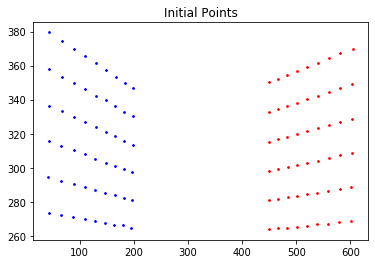

In [153]:
plt.scatter(x_initial, y_initial, s=3, color = 'b');
plt.scatter(x_final, y_final, s=3, color = 'r');
plt.title('Initial Points');

In [154]:
initial_points_right.shape

(100, 54, 2)

In [155]:
initial_points_right = torch.from_numpy(initial_points_right).float()
final_points_right = torch.from_numpy(final_points_right).float()

In [156]:
initial_points_right = torch.cat([initial_points_right, torch.ones(initial_points_right.shape[:2], dtype = torch.float32).unsqueeze(2)], dim = 2) 
final_points_right = torch.cat([final_points_right, torch.ones(final_points_right.shape[:2], dtype = torch.float32).unsqueeze(2)], dim = 2)

In [157]:
initial_points_right = initial_points_right.reshape(-1,3).T
final_points_right = final_points_right.reshape(-1,3).T

In [158]:
initial_points_right.shape

torch.Size([3, 5400])

In [159]:
final_points_right.shape

torch.Size([3, 5400])

In [160]:
H_rc = np.array(H_rc)

In [161]:
H_rc = torch.from_numpy(H_rc)

In [162]:
H_rc[0]

tensor([[-3.0672e-01, -3.6129e-03,  4.2778e+02],
        [-4.6848e-01,  7.4930e-01,  5.7304e+01],
        [-2.0089e-03,  1.4033e-05,  1.0000e+00]], dtype=torch.float64)

In [164]:
def normalize(x):
    return x[:2]/x[2]

In [165]:
A = np.vstack([
    [
      [ 0, 0, 0, -x * w_, -y * w_, - w * w_, x * y_, y * y_, w * y_ ],
      [ x * w_, y * w_, w * w_, 0, 0, 0, -x * x_, -y * x_, -w * x_ ],
    ]
  for (x, y, w), (x_, y_, w_) in zip(initial_points_right.T[:48*100], final_points_right.T[:48*100])
])

In [166]:
A = torch.from_numpy(A).float()

In [228]:
h = H_rc[0].flatten().float()

In [229]:
h

tensor([-3.0672e-01, -3.6129e-03,  4.2778e+02, -4.6848e-01,  7.4930e-01,
         5.7304e+01, -2.0089e-03,  1.4033e-05,  1.0000e+00])

In [230]:
h = torch.eye(3,dtype=torch.float32)

In [231]:
h = h.flatten()

In [232]:
h.requires_grad_(True)

tensor([1., 0., 0., 0., 1., 0., 0., 0., 1.], requires_grad=True)

In [233]:
torch.mean((A @ h) ** 2)

tensor(78869.9141, grad_fn=<MeanBackward0>)

In [244]:
optim = torch.optim.Adam([h], lr=1e-5)

In [245]:
iters = 100000
for i in range(iters):
    optim.zero_grad()
    loss = torch.sum((A @ h) ** 2)
    loss.backward()
    optim.step()

In [246]:
torch.mean((A @ h) ** 2)

tensor(0.0016, grad_fn=<MeanBackward0>)

In [247]:
initial_points_right = initial_points_right.detach().numpy()

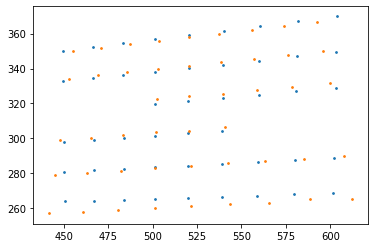

In [252]:
IDX = 4
show_only = slice(48 * IDX, 48 * (IDX + 1))
plt.scatter(*normalize(final_points_right)[:2, show_only], s=3)
plt.scatter(*normalize(h.detach().reshape(3,3).numpy() @ initial_points_right)[:2, show_only], s=3)

In [253]:
(h / h[8]).reshape(3,3)

tensor([[-1.5214e-01,  2.8098e+00,  2.6501e+02],
        [-9.0131e-01,  3.9685e+00, -4.4915e+02],
        [-4.4197e-03,  5.5337e-03,  1.0000e+00]], grad_fn=<ViewBackward>)

In [254]:
np.save('transform_right_center', (h / h[8]).detach().reshape(3,3).numpy())

# Left

In [273]:
initial_points_left = np.array(initial_points_left)
final_points_left = np.array(final_points_left)

In [274]:
initial_points_left = initial_points_left.squeeze(2)
final_points_left = final_points_left.squeeze(2)

In [277]:
IDX = 40
x_initial_l = [pts[0] for pts in initial_points_left[IDX]]
y_initial_l = [pts[1] for pts in initial_points_left[IDX]]
x_final_l = [pts[0] for pts in final_points_left[IDX]]
y_final_l = [pts[1] for pts in final_points_left[IDX]]
H_32 = np.array(H_lc[IDX])

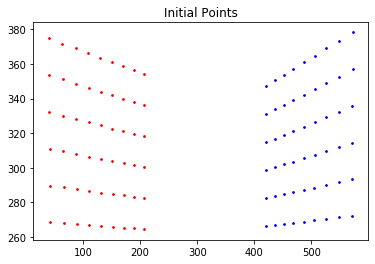

In [278]:
plt.scatter(x_initial_l, y_initial_l, s=3, color = 'b');
plt.scatter(x_final_l, y_final_l, s=3, color = 'r');
plt.title('Initial Points');

In [279]:
initial_points_left = torch.from_numpy(initial_points_left).float()
final_points_left = torch.from_numpy(final_points_left).float()

In [280]:
initial_points_left = torch.cat([initial_points_left, torch.ones(initial_points_left.shape[:2], dtype = torch.float32).unsqueeze(2)], dim = 2) 
final_points_left = torch.cat([final_points_left, torch.ones(final_points_left.shape[:2], dtype = torch.float32).unsqueeze(2)], dim = 2)

In [282]:
initial_points_left = initial_points_left.reshape(-1,3).T
final_points_left = final_points_left.reshape(-1,3).T

In [284]:
initial_points_left.shape

torch.Size([3, 5400])

In [285]:
A = np.vstack([
    [
      [ 0, 0, 0, -x * w_, -y * w_, - w * w_, x * y_, y * y_, w * y_ ],
      [ x * w_, y * w_, w * w_, 0, 0, 0, -x * x_, -y * x_, -w * x_ ],
    ]
  for (x, y, w), (x_, y_, w_) in zip(initial_points_left.T[:48*100], final_points_left.T[:48*100])
])

In [286]:
A = torch.from_numpy(A).float()

In [287]:
h = torch.eye(3,dtype=torch.float32).flatten()

In [288]:
h.requires_grad_(True)

tensor([1., 0., 0., 0., 1., 0., 0., 0., 1.], requires_grad=True)

In [289]:
torch.mean((A @ h) ** 2)

tensor(65510.1406, grad_fn=<MeanBackward0>)

In [301]:
optim = torch.optim.Adam([h], lr=1e-8)

In [302]:
iters = 100000
for i in range(iters):
    optim.zero_grad()
    loss = torch.sum((A @ h) ** 2)
    loss.backward()
    optim.step()

In [303]:
torch.mean((A @ h) ** 2)

tensor(0.0020, grad_fn=<MeanBackward0>)

In [304]:
initial_points_left = initial_points_left.detach().numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'detach'

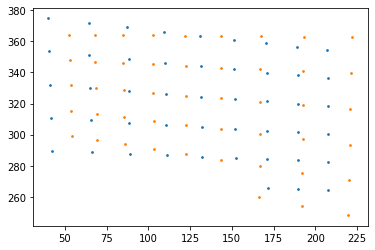

In [307]:
IDX = 90
show_only = slice(48 * IDX, 48 * (IDX + 1))
plt.scatter(*normalize(final_points_left)[:2, show_only], s=3)
plt.scatter(*normalize(h.detach().reshape(3,3).numpy() @ initial_points_left)[:2, show_only], s=3)

In [308]:
np.save('transform_left_center', (h / h[8]).detach().reshape(3,3).numpy())